<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Simple_Linear_Regression_SalaryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2.Salary_hike ->Predict Salary_hike based on Years of Experience
Ans: Simple linear regression is the best model with the highest Rsquared value 95.7% and overall error(RMSE) of 5592 which is the lowest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
sd=pd.read_csv("Salary_Data.csv")
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
sd.shape

(30, 2)

In [6]:
sd.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
sd.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0, 0.5, 'Salary')

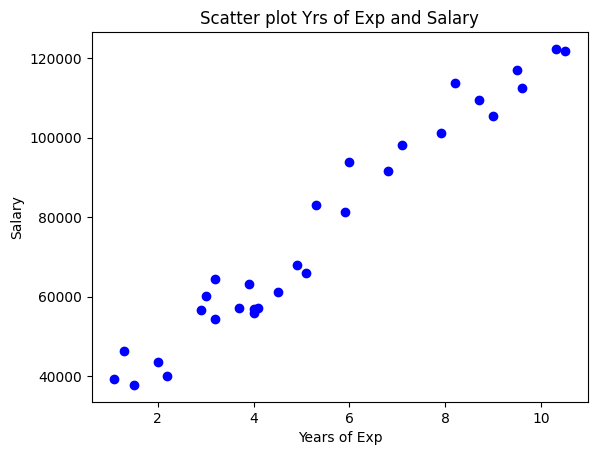

In [10]:
plt.plot(sd["YearsExperience"],sd["Salary"],"bo")
plt.title("Scatter plot Yrs of Exp and Salary")
plt.xlabel("Years of Exp")
plt.ylabel("Salary")

Text(0.5, 1.0, 'Distplot Yrs of Exp')

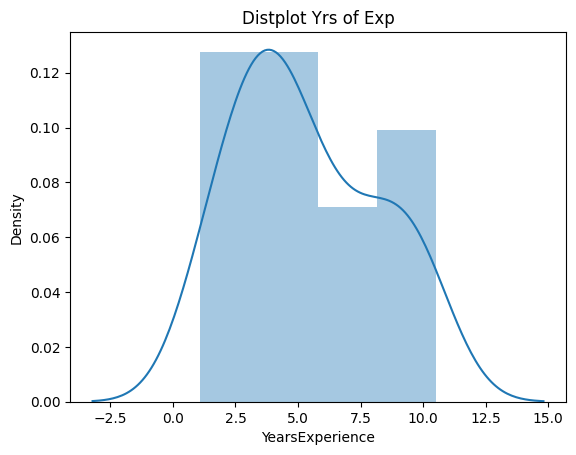

In [11]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(sd["YearsExperience"])
plt.title("Distplot Yrs of Exp")

Text(0.5, 1.0, 'Distplot Salary')

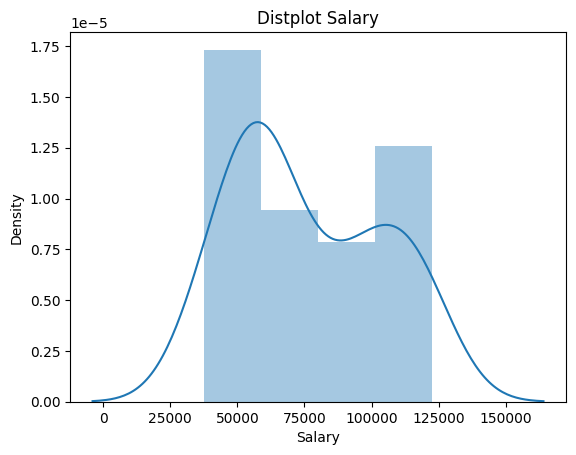

In [12]:
sns.distplot(sd["Salary"])
plt.title("Distplot Salary")

<Axes: xlabel='YearsExperience', ylabel='Salary'>

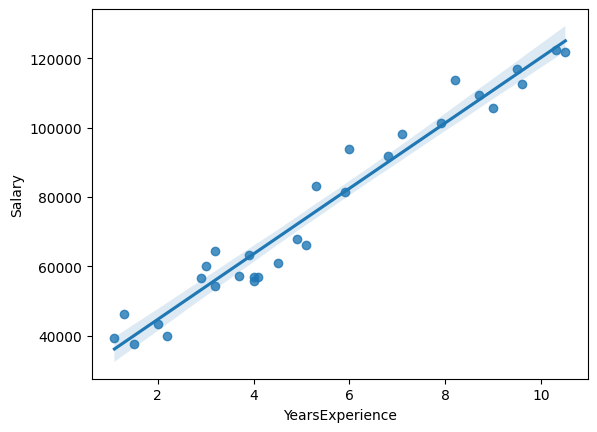

In [13]:
sns.regplot(x="YearsExperience",y="Salary",data=sd)

In [14]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [15]:
model=smf.ols("Salary~YearsExperience",data=sd).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        06:43:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [18]:
pred=model.predict(sd)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [19]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [20]:
rmse=np.sqrt(np.mean((np.array(sd["Salary"])-np.array(pred))**2))
rmse

5592.043608760662

In [21]:
pred.corr(sd.Salary)

0.9782416184887601

Text(0, 0.5, 'Salary')

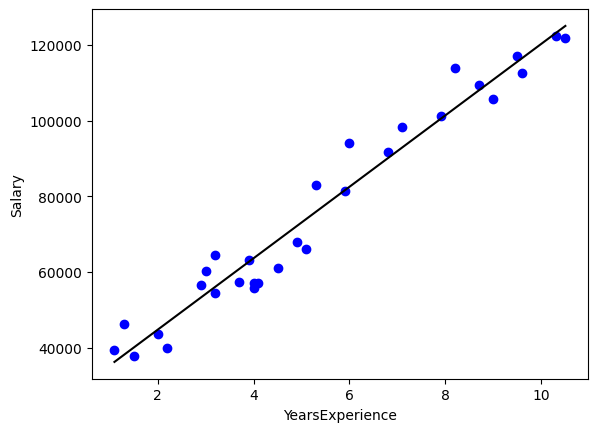

In [22]:
plt.scatter(x=sd["YearsExperience"],y=sd["Salary"],c="blue")
plt.plot(sd["YearsExperience"],pred,color="Black")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [23]:
#Log Model
model1=smf.ols("Salary~np.log(YearsExperience)",data=sd).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.25e-13
Time:                        06:43:48   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
pred1=model1.predict(sd)
pred1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [25]:
model1.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [26]:
rmse=np.sqrt(np.mean((np.array(sd["Salary"])-np.array(pred1))**2))
rmse

10302.893706228306

Text(0, 0.5, 'Salary')

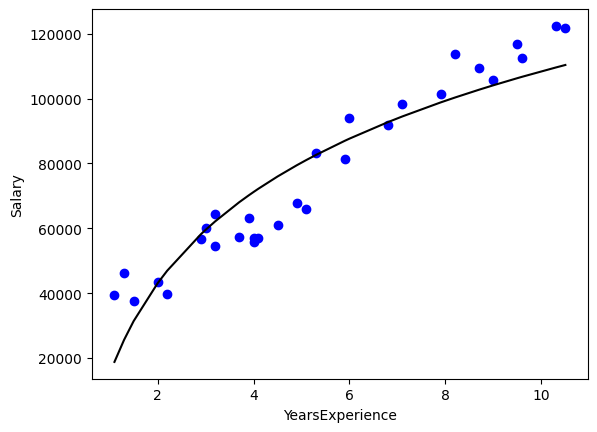

In [27]:
plt.scatter(x=sd["YearsExperience"],y=sd["Salary"],c="blue")
plt.plot(sd["YearsExperience"],pred1,color="Black")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [28]:
#Exponential Model
model2=smf.ols("np.log(Salary)~YearsExperience",data=sd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           7.03e-18
Time:                        06:43:49   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2.resid

0    -0.065327
1     0.070353
2    -0.157344
3    -0.077217
4    -0.189492
5     0.073291
6     0.120836
7    -0.003905
8     0.164716
9    -0.017461
10    0.057676
11   -0.079792
12   -0.059162
13   -0.069532
14   -0.051493
15    0.004230
16   -0.049362
17    0.155353
18    0.059102
19    0.190292
20    0.066210
21    0.097387
22    0.027382
23    0.106188
24    0.004207
25   -0.069235
26   -0.029540
27   -0.079842
28   -0.084591
29   -0.113931
dtype: float64

In [31]:
pred_log=model2.predict(sd["YearsExperience"])
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [32]:
pred2=np.exp(pred_log)
pred2

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [33]:
rmse=np.sqrt(np.mean((np.array(sd['Salary'])-np.array(pred2))**2))
rmse

7213.235076620168

In [34]:
pred2.corr(sd.Salary)

0.9660469705377086

Text(0, 0.5, 'Salary')

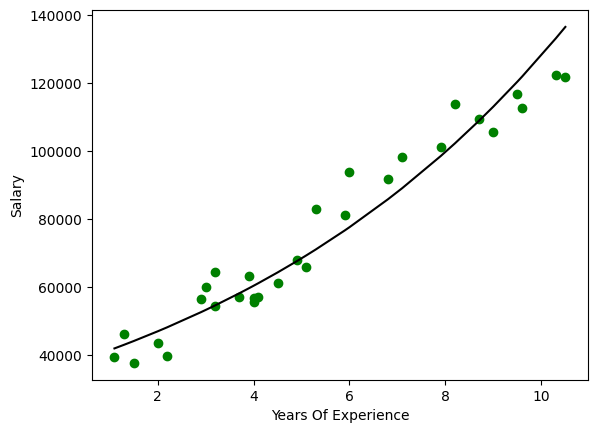

In [35]:
plt.scatter(x=sd['YearsExperience'],y=sd['Salary'],color='green')
plt.plot(sd['YearsExperience'],pred2,color='Black')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')

In [40]:
#Quadratic model
YearsExperience_sq=sd.YearsExperience*sd.YearsExperience
sd["YearsExperience_sq"]=pd.DataFrame(YearsExperience_sq)
sd

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [42]:
model3=smf.ols("np.log(Salary)~YearsExperience_sq",data=sd).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     145.5
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.32e-12
Time:                        06:57:15   Log-Likelihood:                 15.229
No. Observations:                  30   AIC:                            -26.46
Df Residuals:                      28   BIC:                            -23.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.8139      0.041    266.355      0.000      10.731      10.897
YearsExperience_sq     0.0100      0.001     12.064      0.000       0.008       0.012
==============================================================================
Omnibus:                        0.711   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.787
Skew:                          -0.263   Prob(JB):                        0.675
Kurtosis:                       2.406   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model3.resid

0    -0.245964
1    -0.089992
2    -0.298196
3    -0.172836
4    -0.268418
5     0.046495
6     0.100688
7    -0.011358
8     0.157263
9     0.003326
10    0.088359
11   -0.044461
12   -0.023831
13   -0.029753
14    0.004080
15    0.072398
16    0.023904
17    0.232918
18    0.144763
19    0.276603
20    0.150522
21    0.177650
22    0.088051
23    0.156211
24    0.032489
25   -0.056398
26   -0.046443
27   -0.103292
28   -0.159472
29   -0.205306
dtype: float64

In [45]:
pred_log=model3.predict(sd)
pred_log

0     10.826037
1     10.830836
2     10.836434
3     10.853927
4     10.862324
5     10.898011
6     10.903909
7     10.916304
8     10.916304
9     10.950791
10    10.965986
11    10.973883
12    10.973883
13    10.981980
14    11.016367
15    11.053953
16    11.073945
17    11.094738
18    11.161913
19    11.173808
20    11.276170
21    11.317855
22    11.437810
23    11.486092
24    11.570561
25    11.623641
26    11.716107
27    11.735200
28    11.874448
29    11.916033
dtype: float64

In [47]:
pred3=np.exp(pred_log)
pred3

0      50313.941728
1      50555.939087
2      50839.740832
3      51736.930558
4      52173.188446
5      54068.700845
6      54388.529948
7      55066.892904
8      55066.892904
9      56999.122364
10     57871.800427
11     58330.627200
12     58330.627200
13     58804.847130
14     60862.152542
15     63193.253769
16     64469.363410
17     65823.861002
18     70397.478777
19     71239.898318
20     78918.447476
21     82277.651794
22     92763.659960
23     97352.365799
24    105932.877005
25    111707.733821
26    122529.472739
27    124891.392896
28    143551.345442
29    149646.722450
dtype: float64

In [48]:
rmse=np.sqrt(np.mean((np.array(sd['Salary'])-np.array(pred3))**2))
rmse

11358.090819292247

In [49]:
pred3.corr(sd.Salary)

0.9186556660960992

Text(0, 0.5, 'Salary')

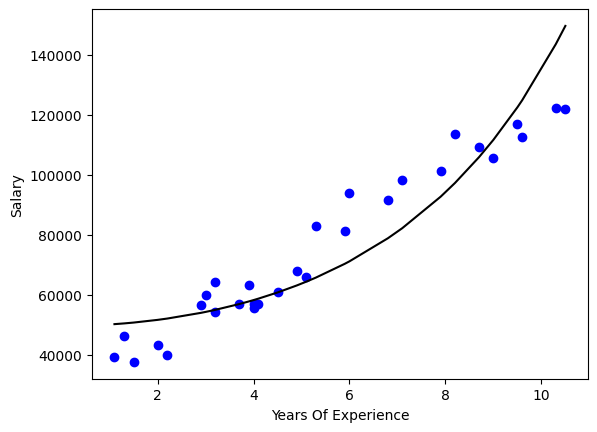

In [50]:
plt.scatter(x=sd['YearsExperience'],y=sd['Salary'],color='blue')
plt.plot(sd['YearsExperience'],pred3,color='Black')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')